In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
file_path = "/content/drive/My Drive/final_train_df.csv"
df = pd.read_csv(file_path)

df.head()

,Unnamed: 0,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,0,1,25,Female,Instagram,120.0,3.0,45.0,10.0,12.0,Happiness
1,1,2,30,Male,Twitter,90.0,5.0,20.0,25.0,30.0,Anger
2,2,3,22,Non-binary,Facebook,60.0,2.0,15.0,5.0,20.0,Neutral
3,3,4,28,Female,Instagram,200.0,8.0,100.0,30.0,50.0,Anxiety
4,4,5,33,Male,LinkedIn,45.0,1.0,5.0,2.0,10.0,Boredom


In [ ]:
df_cleaned = df.drop(columns = ["Unnamed: 0", "User_ID"])
label_encoders = {}
categorial_columns = ["Gender", "Platform"]
for col in categorial_columns:
  le = LabelEncoder()
  df_cleaned[col] = le.fit_transform(df_cleaned[col])
  label_encoders[col] = le


target_encoder = LabelEncoder()
df_cleaned["Dominant_Emotion"] = target_encoder.fit_transform(df_cleaned["Dominant_Emotion"])


In [ ]:
X = df_cleaned.drop(columns=["Dominant_Emotion"])
y = df_cleaned["Dominant_Emotion"]

In [ ]:
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42, stratify = y)

In [ ]:
param_grid = {
    'n_estimators' : [100,200,300],
    'max_depth' : [None, 10,20,30],
    'min_samples_split' : [2,5,10],
    'min_samples_leaf' : [1,2,4]
}

In [ ]:
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5,n_jobs=-1, verbose=2)
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [ ]:
best_model = grid_search.best_estimator_

In [ ]:
y_pred = best_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [ ]:
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Accuracy: 0.98
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      0.94      0.97        34
           2       0.97      1.00      0.98        28
           3       0.97      0.95      0.96        40
           4       0.95      1.00      0.98        40
           5       1.00      1.00      1.00        32

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



In [ ]:
import joblib

joblib.dump(best_model, 'random_forest_GS.pkl')
# joblib.dump(label_encoders, "label_encoders.pkl")
# joblib.dump(target_encoder, "target_encoder.pkl")


['random_forest_GS.pkl']

In [ ]:
model = joblib.load("random_forest_GS.pkl")

In [ ]:
test_file_path = '/content/drive/My Drive/final_test_df.csv'
val_file_path = '/content/drive/My Drive/final_val_df.csv'


In [ ]:
df_test = pd.read_csv(test_file_path)
df_val = pd.read_csv(val_file_path)

In [ ]:
df_test = df_test.drop(columns=["Unnamed: 0", "User_ID"], errors='ignore')
df_val = df_val.drop(columns=["Unnamed: 0", "User_ID"], errors='ignore')

In [ ]:
# label_encoders = joblib.load("label_encoders.pkl")
# target_encoder = joblib.load("target_encoder.pkl")

In [ ]:
print("label",label_encoders)
print("target",target_encoder)

label {'Gender': LabelEncoder(), 'Platform': LabelEncoder()}
target LabelEncoder()


In [ ]:
label_encoders = {}
categorial_columns = ["Gender", "Platform"]
for col in categorial_columns:
  le = LabelEncoder()
  df_test[col] = le.fit_transform(df_test[col])
  df_val[col] = le.fit_transform(df_val[col])
  label_encoders[col] = le


target_encoder = LabelEncoder()
df_test["Dominant_Emotion"] = target_encoder.fit_transform(df_test["Dominant_Emotion"])
df_val["Dominant_Emotion"] = target_encoder.fit_transform(df_val["Dominant_Emotion"])



In [ ]:
print(df_test["Dominant_Emotion"])
print(df_val["Dominant_Emotion"])

0      4
1      4
2      1
3      1
4      4
      ..
98     4
99     2
100    5
101    4
102    2
Name: Dominant_Emotion, Length: 103, dtype: int64
0      0
1      0
2      0
3      0
4      0
      ..
139    0
140    0
141    0
142    0
143    0
Name: Dominant_Emotion, Length: 144, dtype: int64


In [ ]:
X_test, y_test = df_test.drop(columns=["Dominant_Emotion"]), df_test["Dominant_Emotion"]
X_val, y_val = df_val.drop(columns=["Dominant_Emotion"]), df_val["Dominant_Emotion"]

# Predict on test set
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)

# Predict on validation set
y_val_pred = model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_report = classification_report(y_val, y_val_pred)

# Print results
print("Test Accuracy:", test_accuracy)
print("Test Report:\n", test_report)
print("\nValidation Accuracy:", val_accuracy)
print("Validation Report:\n", val_report)

Test Accuracy: 0.970873786407767
Test Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.91      0.95        22
           2       0.94      0.94      0.94        16
           3       0.93      1.00      0.97        14
           4       1.00      1.00      1.00        28
           5       0.93      1.00      0.97        14

    accuracy                           0.97       103
   macro avg       0.97      0.97      0.97       103
weighted avg       0.97      0.97      0.97       103


Validation Accuracy: 0.041666666666666664
Validation Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.03      0.08      0.05        12
           2       0.12      0.06      0.09        31
           3       0.04      0.06      0.04        18
           4       0.00      0.00      0.00        27
           5       0.0

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

In [ ]:
confusion_arr = confusion_matrix(y_test, y_test_pred, normalize='true')


In [ ]:
df["Dominant_Emotion"].unique()

array(['Happiness', 'Anger', 'Neutral', 'Anxiety', 'Boredom', 'Sadness'],
      dtype=object)

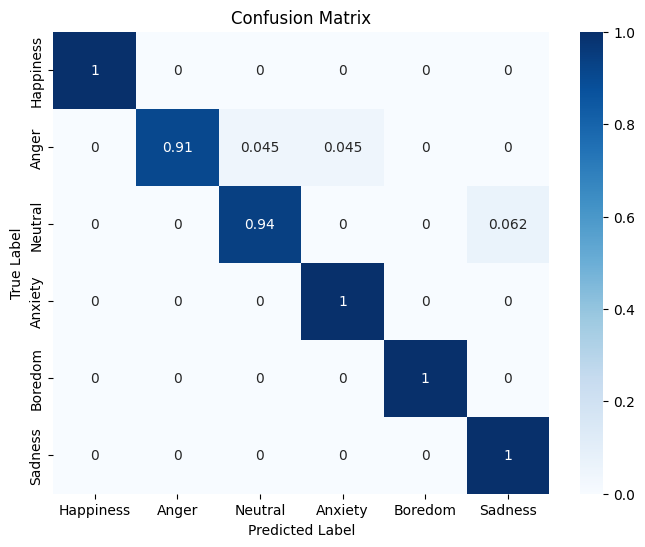

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_arr, annot=True, cmap="Blues", xticklabels=df['Dominant_Emotion'].unique(), yticklabels=df["Dominant_Emotion"].unique())
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()